# C964 Computer Science Capstone
## Chase Seidel
## Student ID: 011140261

In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [30]:
import seaborn as seaborn
import pandas as pandas
import matplotlib.pyplot as pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [31]:
data = pandas.read_csv("insurance.csv")

def categorizeAge(age):
    if age <= 30:
        return "Young Adult"
    elif 31 <= age <= 55:
        return "Middle-aged Adult"
    else:
        return "Senior"

data["age_group"] = data["age"].apply(categorizeAge)
data["age_smoker"] = data["age"] * (data["smoker"] == "yes")

## Data Visuals

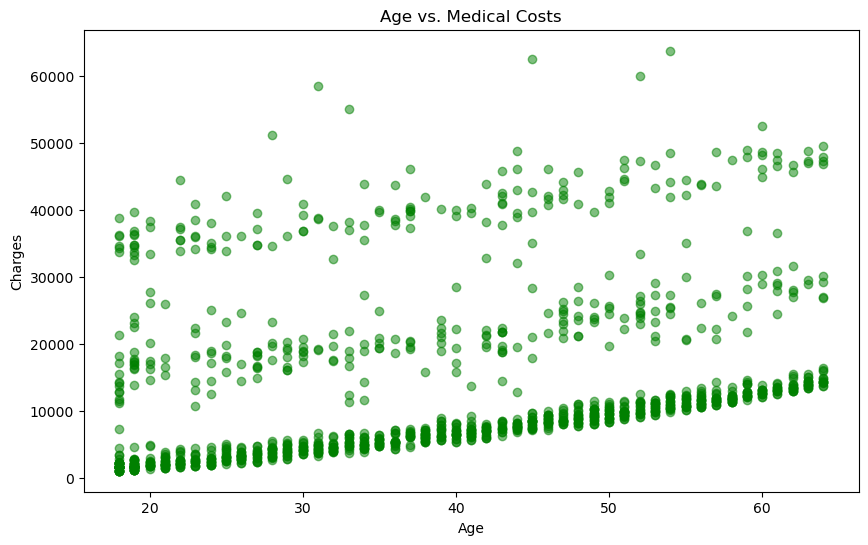

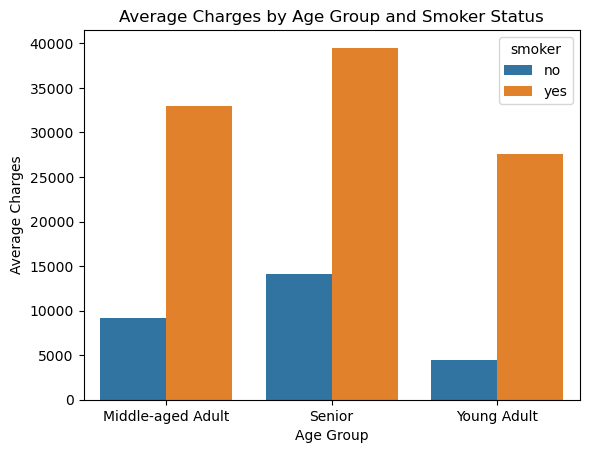

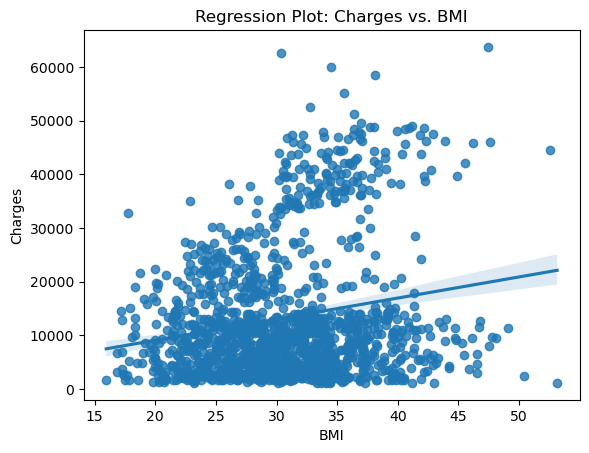

In [33]:
# This scatter plot shows charges vs age
pyplot.figure(figsize=(10, 6))
pyplot.scatter(data["age"], data["charges"], color="green", alpha=0.5)
pyplot.xlabel("Age")
pyplot.ylabel("Charges")
pyplot.title("Age vs. Medical Costs")
pyplot.show()

# This shows the average charges by age group and smoker status
avg_charges_age_smoker = data.groupby(["age_group", "smoker"])["charges"].mean().reset_index()
seaborn.barplot(x="age_group", y="charges", hue="smoker", data=avg_charges_age_smoker)
pyplot.title("Average Charges by Age Group and Smoker Status")
pyplot.xlabel("Age Group")
pyplot.ylabel("Average Charges")
pyplot.show()

# This regression plot shows charges vs bmi
seaborn.regplot(x="bmi", y="charges", data=data)
pyplot.title("Regression Plot: Charges vs. BMI")
pyplot.xlabel("BMI")
pyplot.ylabel("Charges")
pyplot.show()

## Data Feature Importance


Random Forest Regression Metrics:
Mean Absolute Error: 2977.175304216712
Mean Squared Error: 25707340.66232682
R-squared Score: 0.8215085373660036


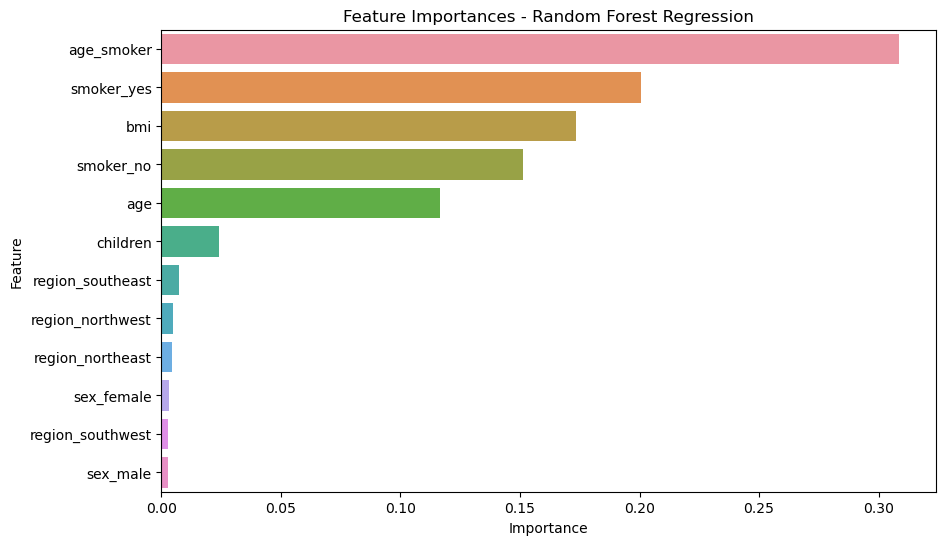

In [34]:
features = ["age", "sex", "bmi", "children", "smoker", "region", "age_smoker"]
target = "charges"

oneHotEncodings = pandas.get_dummies(data[features])
targetColumn = data[target]

# Split the data into training and testing sets
featuresTrainingSet, featuresTestingSet, chargesTrainingSet, chargesTestingSet = train_test_split(oneHotEncodings, targetColumn, test_size=0.8, random_state=42)

# Random Forest Regression
randomForestRegression = RandomForestRegressor(n_estimators=100, random_state=42)
randomForestRegression.fit(featuresTrainingSet, chargesTrainingSet)

# Predict on the testing set
predictions = randomForestRegression.predict(featuresTestingSet)

# Evaluate the model
meanAbsoluteError = mean_absolute_error(chargesTestingSet, predictions)
meanSquaredError = mean_squared_error(chargesTestingSet, predictions)
r2Score = r2_score(chargesTestingSet, predictions)

print("\nRandom Forest Regression Metrics:")
print("Mean Absolute Error:", meanAbsoluteError)
print("Mean Squared Error:", meanSquaredError)
print("R-squared Score:", r2Score)

# Feature Analysis for Random Forest Regression
featureImportances = randomForestRegression.feature_importances_
dataFrame = pandas.DataFrame({"Feature": oneHotEncodings.columns, "Importance": featureImportances})
sortedFeatures = dataFrame.sort_values(by="Importance", ascending=False)

# Plotting feature importances
pyplot.figure(figsize=(10, 6))
seaborn.barplot(x="Importance", y="Feature", data=sortedFeatures)
pyplot.title("Feature Importances - Random Forest Regression")
pyplot.xlabel("Importance")
pyplot.ylabel("Feature")
pyplot.show()

In [35]:
def predictMedicalExpense(age, sex, bmi, children, smoker, region, ageSmoker, model):
    regionNorthEast = 0
    regionNorthWest = 0
    regionSouthEast = 0
    regionSouthWest = 0
    sexFemale = 0
    sexMale = 0
    smokerYes = 0
    smokerNo = 0

    if (region.lower() == "northeast"):
        regionNorthEast = 1
    elif (region.lower() == "northwest"):
        regionNorthWest = 1
    elif (region.lower() == "southeast"):
        regionSouthEast = 1
    else:
        regionSouthWest = 1

    if (smoker.lower() == "yes"):
        smokerYes = 1
    else:
        smokerNo = 1

    if (sex.lower() == "male"):
        sexMale = 1
    else:
        sexFemale = 1
    
    inputData = pandas.DataFrame({
        "age": [age],
        "bmi": [bmi],
        "children": [children],
        "age_smoker": [ageSmoker],
        "sex_female": [sexFemale],
        "sex_male": [sexMale],
        "smoker_no": [smokerNo],
        "smoker_yes": [smokerYes],
        "region_northeast": [regionNorthEast],
        "region_northwest": [regionNorthWest],
        "region_southeast": [regionSouthEast],
        "region_southwest": [regionSouthWest],
    })
    inputDataEncoded = pandas.get_dummies(inputData)

    medicalExpensePrediction = model.predict(inputDataEncoded)
    
    return medicalExpensePrediction[0]

# UI
age = int(input("Enter age: "))
sex = input("Enter sex (male/female): ")
bmi = float(input("Enter BMI: "))
children = int(input("Enter number of children: "))
smoker = input("Smoker? (yes/no): ")
region = input("Enter region (southwest/southeast/northwest/northeast): ")
ageSmoker = age * (smoker.lower() == "yes")

predictedMedicalExpense = predictMedicalExpense(age, sex, bmi, children, smoker, region, ageSmoker, randomForestRegression)
print(f"Predicted Medical Expense: ${round(predictedMedicalExpense, 2)}")

Enter age:  45
Enter sex (male/female):  male
Enter BMI:  23.8
Enter number of children:  8
Smoker? (yes/no):  yes
Enter region (southwest/southeast/northwest/northeast):  northeast


Predicted Medical Expense: $24000.45
